Your Name and PRN:
- Name: Ankush Sunil Sonawane
- PRN : 230940128004

# Deep Neural Networks 

### Assignment 01

#### Implement MP Neuron


In [61]:
import os 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [62]:
inpDir = '../input'
outDir = '../output'

In [63]:
RANDOM_STATE = 24 
np.random.seed(RANDOM_STATE)

TEST_SIZE = 0.2 

In [64]:
data_df = pd.read_csv(os.path.join(inpDir,"breast_cancer_mod.csv"))
data_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,1,1,0
1,0,1,0,0,0,0,0,0,0,1,...,1,0,1,0,1,1,0,1,1,0
2,0,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
4,0,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
565,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
566,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
567,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [65]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   mean radius              569 non-null    int64
 1   mean texture             569 non-null    int64
 2   mean perimeter           569 non-null    int64
 3   mean area                569 non-null    int64
 4   mean smoothness          569 non-null    int64
 5   mean compactness         569 non-null    int64
 6   mean concavity           569 non-null    int64
 7   mean concave points      569 non-null    int64
 8   mean symmetry            569 non-null    int64
 9   mean fractal dimension   569 non-null    int64
 10  radius error             569 non-null    int64
 11  texture error            569 non-null    int64
 12  perimeter error          569 non-null    int64
 13  area error               569 non-null    int64
 14  smoothness error         569 non-null    int64
 15  compac

In [66]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,0.820738,0.383909,0.0,1.0,1.0,1.0,1.0
mean texture,569.0,0.880492,0.324671,0.0,1.0,1.0,1.0,1.0
mean perimeter,569.0,0.827768,0.377914,0.0,1.0,1.0,1.0,1.0
mean area,569.0,0.954306,0.209005,0.0,1.0,1.0,1.0,1.0
mean smoothness,569.0,0.811951,0.391095,0.0,1.0,1.0,1.0,1.0
mean compactness,569.0,0.910369,0.285904,0.0,1.0,1.0,1.0,1.0
mean concavity,569.0,0.917399,0.275520,0.0,1.0,1.0,1.0,1.0
mean concave points,569.0,0.899824,0.300498,0.0,1.0,1.0,1.0,1.0
mean symmetry,569.0,0.831283,0.374831,0.0,1.0,1.0,1.0,1.0
mean fractal dimension,569.0,0.927944,0.258809,0.0,1.0,1.0,1.0,1.0


<Axes: xlabel='target'>

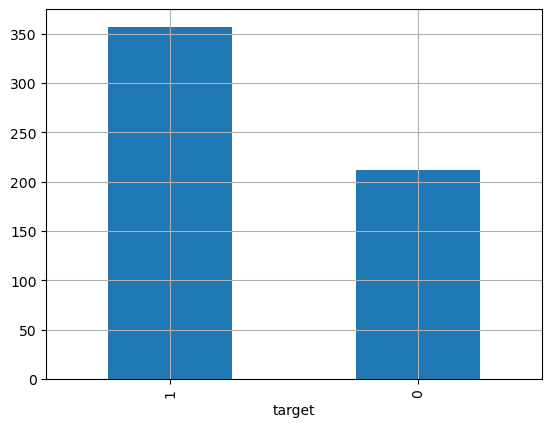

In [67]:
data_df['target'].value_counts().plot(kind='bar',grid=True)

<Axes: xlabel='target'>

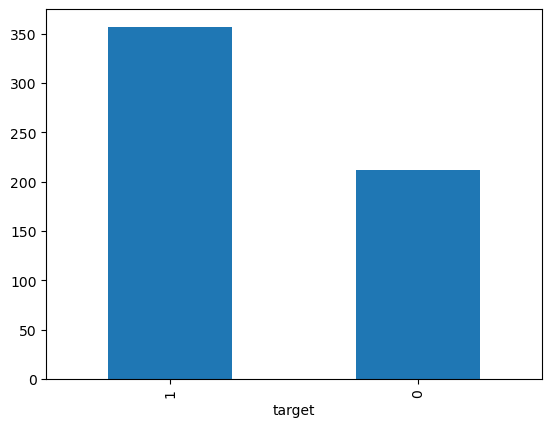

In [68]:
data_df['target'].value_counts().plot(kind='bar')

In [69]:
feature_df = data_df.drop('target',axis=1) # x
labels_df = data_df['target'] # y
feature_df.shape , labels_df.shape

((569, 30), (569,))

In [70]:
x_train,x_test,y_train,y_test = train_test_split(feature_df,labels_df,
                                                 test_size=TEST_SIZE,
                                                 random_state=RANDOM_STATE,
                                                 stratify=labels_df)

print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(455, 30) (114, 30) (455,) (114,)


In [71]:
x_train['total'] = x_train.astype(np.int64).sum(axis=1)
x_test['total'] = x_test.astype(np.int64).sum(axis=1)

In [75]:
x_train['target'] = y_train
x_test['target'] = y_test

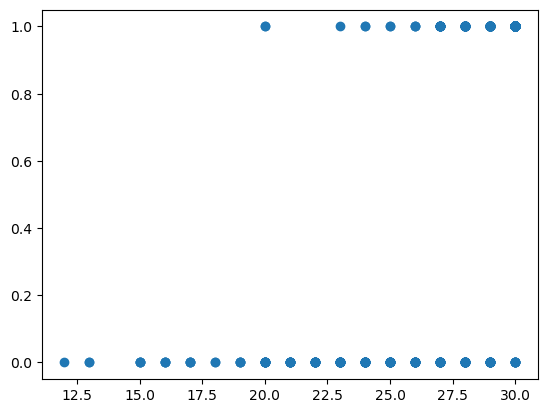

In [76]:
plt.scatter(x_train['total'],x_train['target'])

In [82]:
tmp_df = x_train.groupby(['total','target']).agg({'target':'count'})
tmp_df.columns = ['count']
tmp_df.reset_index(inplace=True)
tmp_df.pivot(index='total',columns='target',values='count')

target,0,1
total,,
12,1.0,NaN
13,2.0,NaN
15,4.0,NaN
16,4.0,NaN
17,4.0,NaN
18,2.0,NaN
19,4.0,NaN
20,10.0,2.0
21,9.0,NaN


<Axes: xlabel='total'>

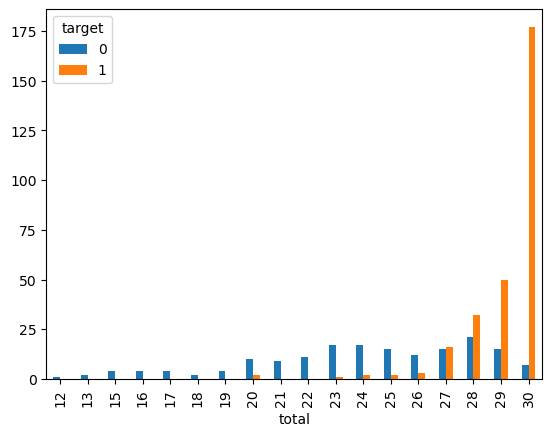

In [80]:
tmp_df.pivot(index='total',columns='target',values='count').plot(kind='bar')
# 1 appears around value 20 yet it becomes more predominant after 27 

<Axes: xlabel='total'>

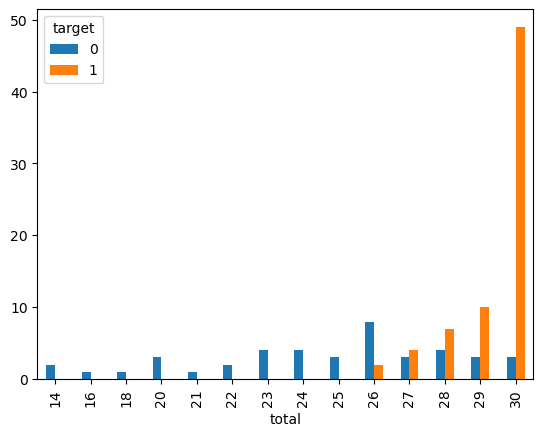

In [83]:
tmp_df = x_test.groupby(['total','target']).agg({'target':'count'})
tmp_df.columns = ['count']
tmp_df.reset_index(inplace=True)
tmp_df.pivot(index='total',columns='target',values='count').plot(kind='bar')

In [84]:
accuracy = {}

for b in range(x_train.shape[1]-1):
    x_train['pred'] = x_train['total'] >= b
    accuracy[b] = accuracy_score(x_train['pred'],x_train['target'])

# it creates different predictions with different thresholds and checks the prediction with accuracy score 
accuracy

{0: 0.6263736263736264,
 1: 0.6263736263736264,
 2: 0.6263736263736264,
 3: 0.6263736263736264,
 4: 0.6263736263736264,
 5: 0.6263736263736264,
 6: 0.6263736263736264,
 7: 0.6263736263736264,
 8: 0.6263736263736264,
 9: 0.6263736263736264,
 10: 0.6263736263736264,
 11: 0.6263736263736264,
 12: 0.6263736263736264,
 13: 0.6285714285714286,
 14: 0.6329670329670329,
 15: 0.6329670329670329,
 16: 0.6417582417582418,
 17: 0.6505494505494506,
 18: 0.6593406593406593,
 19: 0.6637362637362637,
 20: 0.6725274725274726,
 21: 0.6901098901098901,
 22: 0.7098901098901099,
 23: 0.734065934065934,
 24: 0.7692307692307693,
 25: 0.8021978021978022,
 26: 0.8307692307692308,
 27: 0.8505494505494505,
 28: 0.8483516483516483,
 29: 0.8241758241758241,
 30: 0.7472527472527473}

In [89]:
best_b = max(accuracy,key=accuracy.get)
best_b

27

In [91]:
x_test['pred'] = x_test['total'] >= best_b
accuracy_score(x_test['pred'],x_test['target'])

0.868421052631579